## install required packages.

In [1]:
!pip install -U --quiet langchain-google-genai  langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.4 MB/s eta 0:00:00


In [2]:
!pip install pillow==10.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [1]:
import getpass
import os


os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

Provide your Google API Key··········


# import all required packages

In [2]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import JsonOutputParser

# simple Example

In [3]:
import requests
from IPython.display import Image

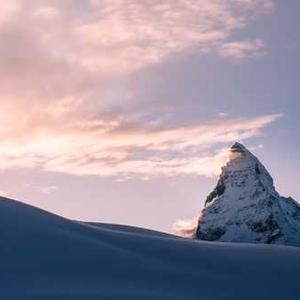

In [4]:
image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

In [5]:
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)

llm.invoke([message])

AIMessage(content=' The image contains a snow-capped mountain peak.')

# Invoice Image to Json

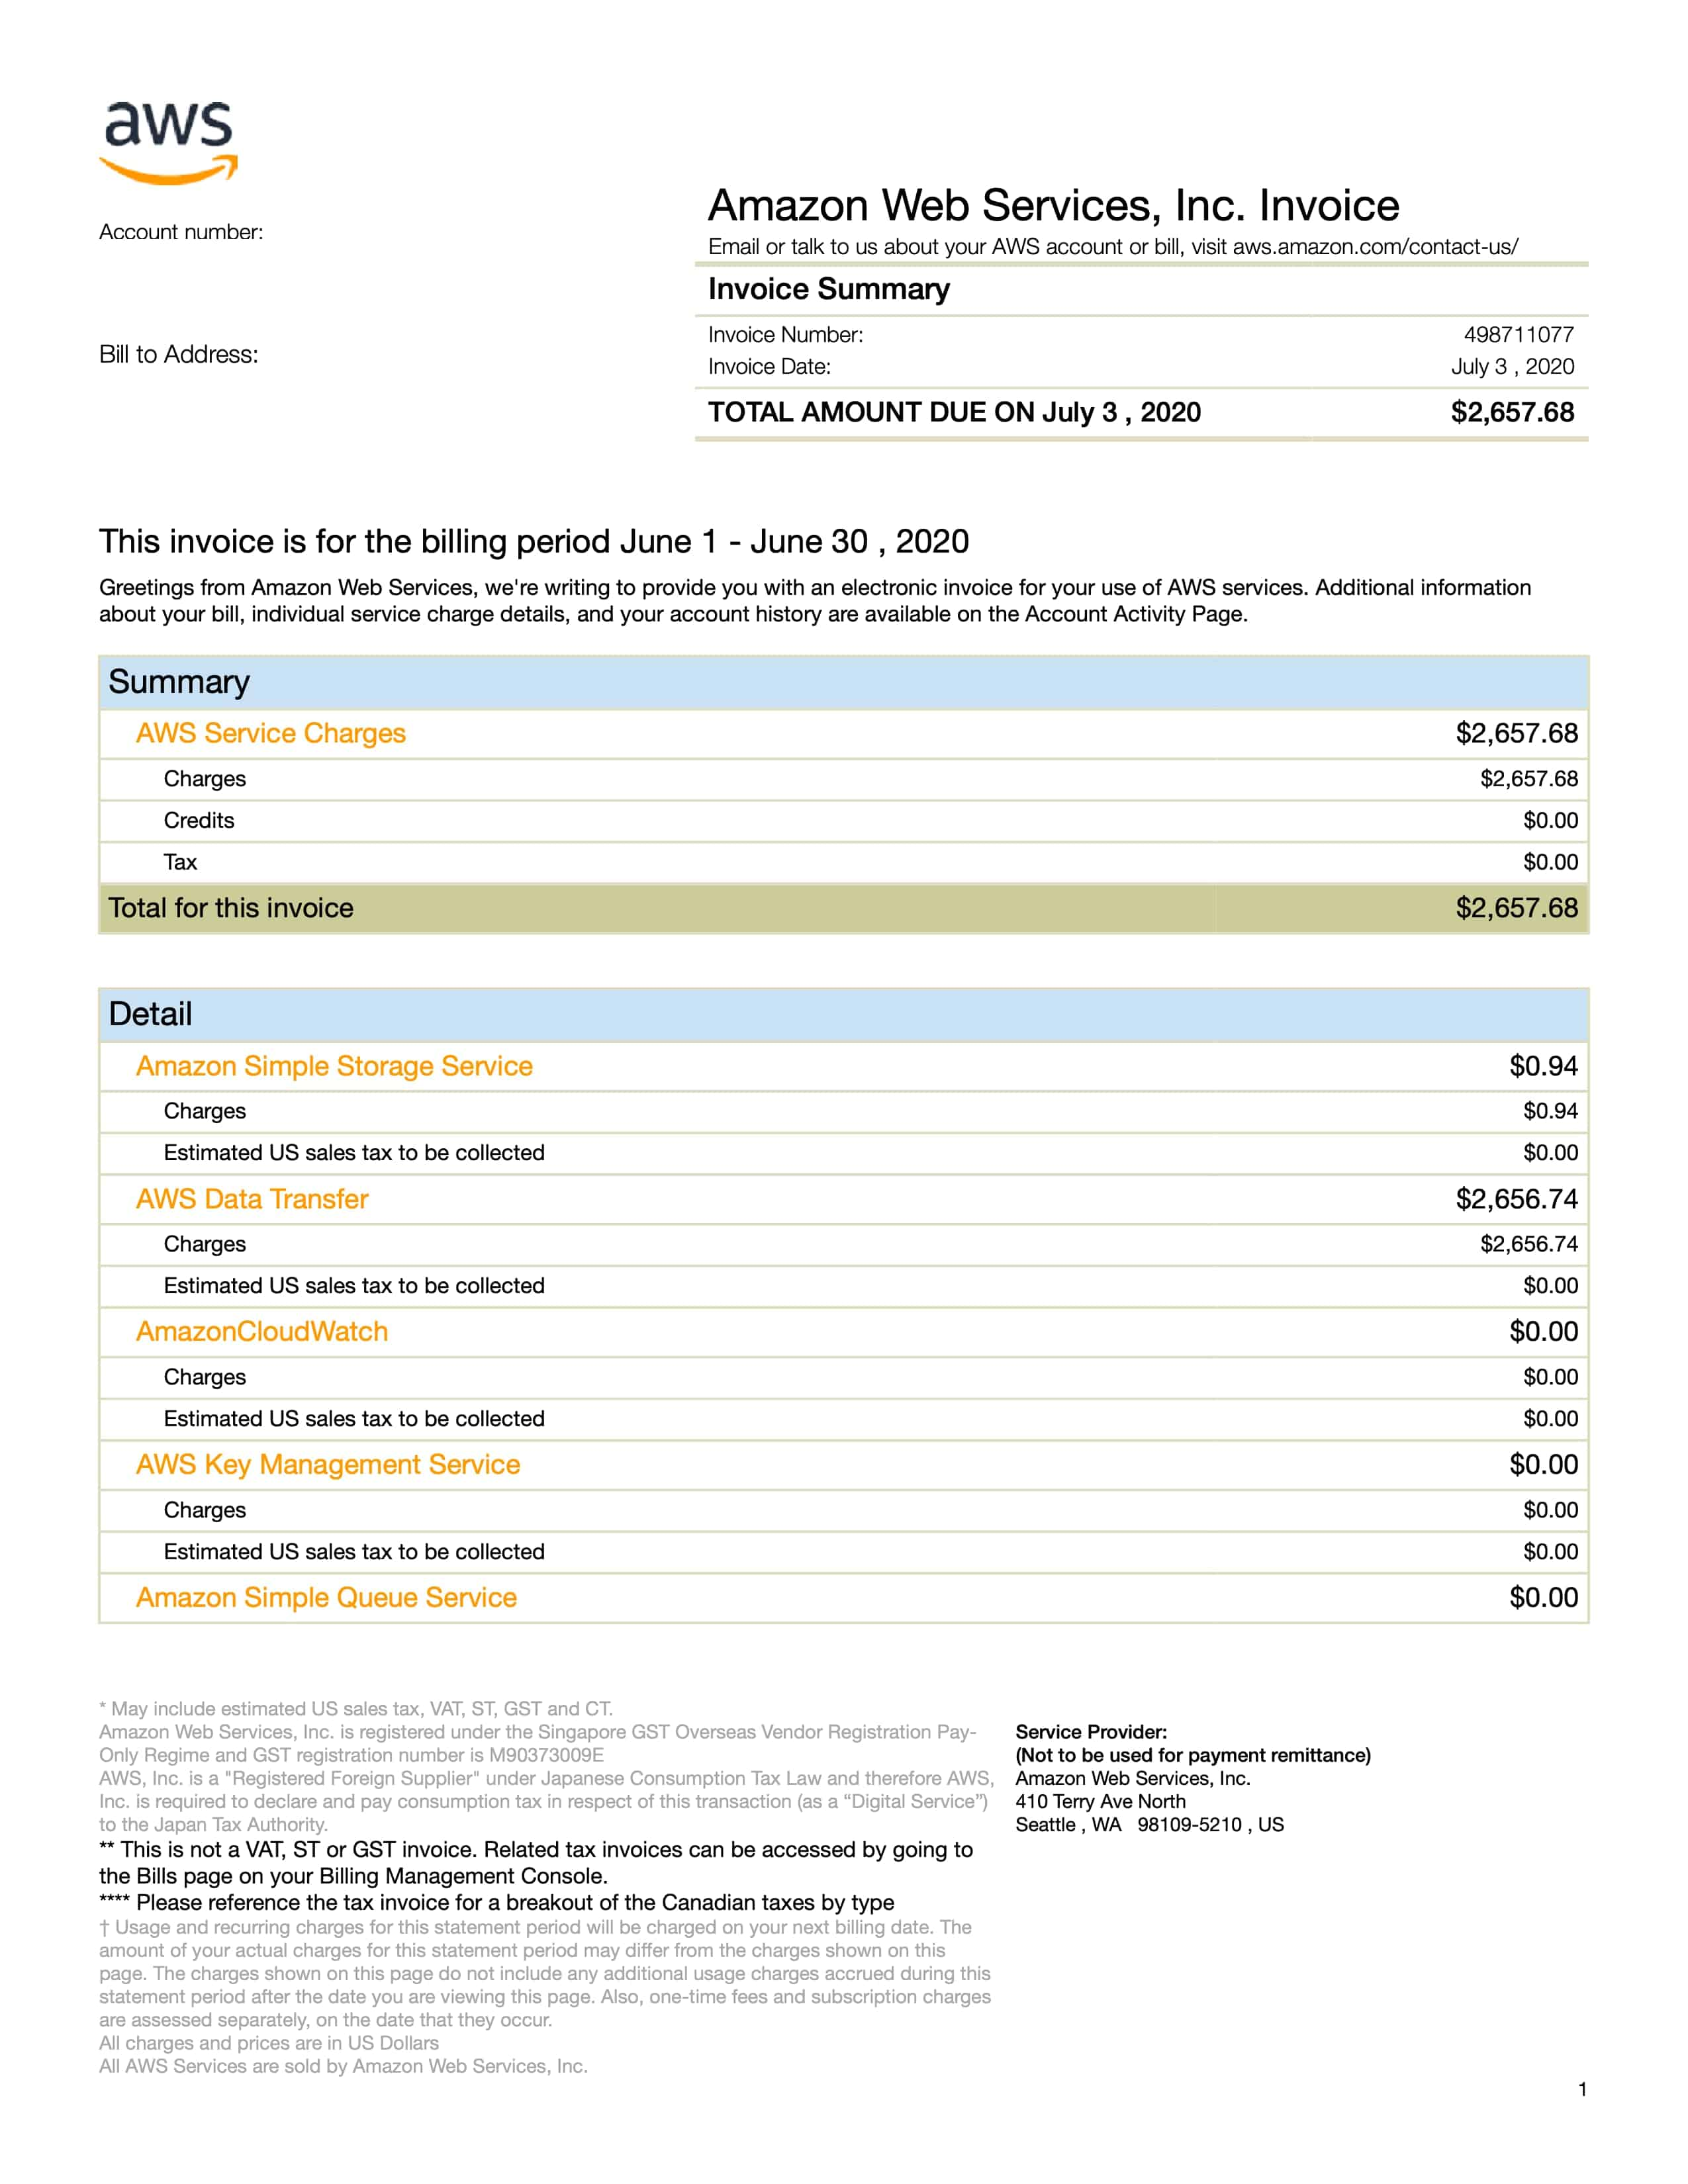

In [10]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/invoice498711077_redacted.jpg'

image = Image.open(file_path)

# Show the image
display(image)

In [11]:
#create the humanmassage propmt templete with the image file
hmessage = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Convert Invoice data into json format with appropriate json tags as required for the data in image ",
        },
        {"type": "image_url", "image_url": file_path},
    ]
)

message = llm.invoke([hmessage])

print(message.content)

 ```json
{
  "Invoice Summary": {
    "Invoice Number": "498711077",
    "Invoice Date": "July 3, 2020",
    "Total Amount Due on July 3, 2020": "$2,657.68"
  },
  "Summary": {
    "AWS Service Charges": "$2,657.68",
    "Credits": "$0.00",
    "Tax": "$0.00",
    "Total for this Invoice": "$2,657.68"
  },
  "Detail": {
    "Amazon Simple Storage Service": "$0.94",
    "AWS Data Transfer": "$2,656.74",
    "AmazonCloudWatch": "$0.00",
    "AWS Key Management Service": "$0.00",
    "Amazon Simple Queue Service": "$0.00"
  }
}
```


# Use JsonOutputParser to get in praper json format

In [12]:
from langchain_core.output_parsers import JsonOutputParser

In [13]:
parser = JsonOutputParser()


chain =  llm | parser

bill_json = chain.invoke([hmessage])

print(type(bill_json))
print(bill_json)

<class 'dict'>
{'Invoice Summary': {'Invoice Number': '498711077', 'Invoice Date': 'July 3, 2020', 'Total Amount Due on July 3, 2020': '$2,657.68'}, 'Summary': {'AWS Service Charges': '$2,657.68', 'Credits': '$0.00', 'Tax': '$0.00', 'Total for this Invoice': '$2,657.68'}, 'Detail': [{'Amazon Simple Storage Service': '$0.94', 'AWS Data Transfer': '$2,656.74', 'AmazonCloudWatch': '$0.00', 'AWS Key Management Service': '$0.00', 'Amazon Simple Queue Service': '$0.00'}]}


# Extract Label data from image

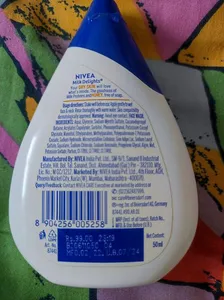

In [14]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/product_blur_2-thumbnail_webp-600x300.webp'

image = Image.open(file_path)

# Show the image
display(image)

In [15]:
product_msg = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Create a json with following tags extracted from image and use information only from image for value of each tag - 'product_name','manufactured_date','expiry_date','manufactured_by','marketed_by','ingredients'",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)
prod_output = llm.invoke([product_msg])

print(prod_output.content)

 ```json
{
  "product_name": "NIVEA Micellar Water",
  "manufactured_date": "2022-07-18",
  "expiry_date": "2024-07-18",
  "manufactured_by": "Nivea",
  "marketed_by": "Nivea",
  "ingredients": "Aqua, Glycerin, Poloxamer 124, Rosa Canina Fruit Extract, Sodium Hyaluronate, Allantoin, Propylene Glycol, PEG-40 Hydrogenated Castor Oil, Sodium Chloride, Citric Acid, Tetrasodium EDTA, Methylparaben, Phenoxyethanol, Parfum"
}
```


# Ask Qusation follow up Question

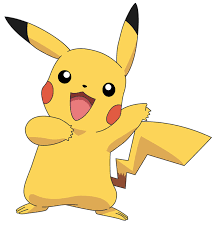

In [16]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/download (10).png'

image = Image.open(file_path)

# Show the image
display(image)

In [17]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Who is this Pokemon?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": file_path},
    ]
)
message_output = llm.invoke([message])

print(message_output.content)

 This is Pikachu, a well-known Pokemon character.


In [18]:
# lets check what inside user massage
message

HumanMessage(content=[{'type': 'text', 'text': 'Who is this Pokemon?'}, {'type': 'image_url', 'image_url': '/content/download (10).png'}])

In [21]:
# we can add text into content
# we will add the message into the 2nd last position
message.content.insert(-1,  {
            "type": "text",
            "text": f"{message_output.content}",
        })

In [22]:
#
new_query = "what types of attack he knows?"

message.content.insert(-1,  {
            "type": "text",
            "text": f"{new_query}",
        })

In [23]:
message

HumanMessage(content=[{'type': 'text', 'text': 'Who is this Pokemon?'}, {'type': 'text', 'text': ' This is Pikachu, a well-known Pokemon character.'}, {'type': 'text', 'text': 'what types of attack he knows?'}, {'type': 'image_url', 'image_url': '/content/download (10).png'}])

In [24]:
message_output = llm.invoke([message])

print(message_output.content)

 Electric attacks are Pikachu's specialty, but it can also learn other types of attacks, such as Normal, Flying, and Steel-type attacks. Some of the attacks Pikachu can learn include Thunderbolt, Quick Attack, Iron Tail, and Agility.
